In [200]:
from PIL import Image, ImageOps
import numpy as np
import math
from collections import Counter

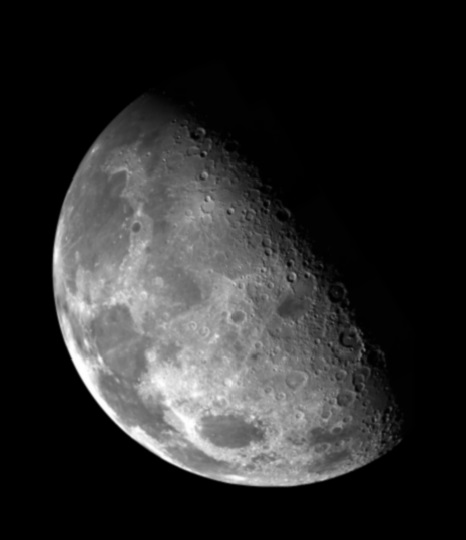

In [216]:
path = "DIP3E_Original_Images_CH03\Fig0338(a)(blurry_moon).jpg"  # converted .tif to .jpg
img  = Image.open(path) 
img_w, img_h = img.size
img = ImageOps.grayscale(img)
img

### Q1

In [217]:
def basic(img):
    size = img.size
    
    img = np.array(img)
    mean = img.mean()
    std = img.std()
    snr = mean/std
    
    shp = np.array(img).shape
    
    try: 
        if shp[2]:
            bit_depth = 24
    except:
        bit_depth = 8
    
    return size, snr, bit_depth
        

In [218]:
size, snr, bit_depth = basic(img)
print(" Image size: ", size, "\n", 'SNR: ', snr, '\n', 'Bit depth: ', bit_depth)

 Image size:  (466, 540) 
 SNR:  0.6616886332115782 
 Bit depth:  8


### Q2

In [219]:
def entropy(img):
    
    img = np.array(img)
    
    probs = Counter()
    
    for i in range(len(img)):
        probs.update(img[i])
    
    entropy = 0

    for i in range(0,256):
        prob = probs[i]/(size[0]*size[1])
        entropy += prob*math.log2(1/prob) 
        
    print("Entropy ", entropy)

In [220]:
entropy(img)

Entropy  4.157463608536162


### Q3

In [172]:
def flip_vert(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    
    new_img = Image.new(mode='L', size=(height, width))

    for r in range(height):
        for c in range(width):
            temp = img.getpixel((r,c))
            new_img.putpixel( (r, (width-1)-c), (temp) )
            
    new_file = 'flipped_img' + '.jpg'
    new_img.save(new_file)
    
    return new_img

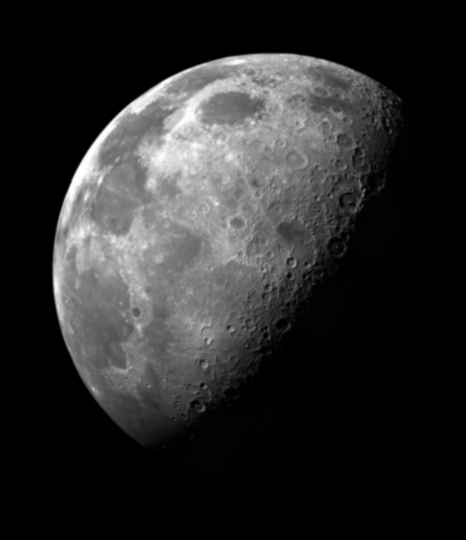

In [221]:
path = "DIP3E_Original_Images_CH03\Fig0338(a)(blurry_moon).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

new_img = flip_vert(img)
new_img

### Q4

In [222]:
def multiply(img1, img2):
    
    size = img1.size
    height = size[0]
    width = size[1]
    
    # multiplying images
    
    new_img = Image.new(mode='L', size=(height, width))

    for r in range(height):
        for c in range(width):
            
            temp1 = img1.getpixel((r,c))
            temp2 = img2.getpixel((r,c))
            val = temp1 * temp2
            
            new_img.putpixel( (r,c), (val) )
    
    
    # calculating fm - modified image for normalization
    
    modified_img = Image.new(mode='L', size=(height, width))
    
    f = new_img
    min_val = 0
    
    for r in range(height):
        for c in range(width):
            val1 = f.getpixel((r,c))
            fm_val = val1 - min_val
            
            modified_img.putpixel( (r,c), (fm_val) )
         
        
    # caculating fr - resultant image
    
    resultant_img = Image.new(mode='L', size=(height, width))
    
    fm = modified_img
    max_val = 0
    
    for r in range(height):
        for c in range(width):
            val1 = fm.getpixel((r,c))
            
            if val1 > max_val:
                max_val = val1
    
    for r in range(height):
        for c in range(width):
            
            val1 = modified_img.getpixel((r,c))
            fr_val = 255*(val1/max_val)
            
            resultant_img.putpixel( (r,c), int(fr_val) )
    
    new_file = 'multiplied_img' + '.jpg'
    resultant_img.save(new_file)
    
    return resultant_img

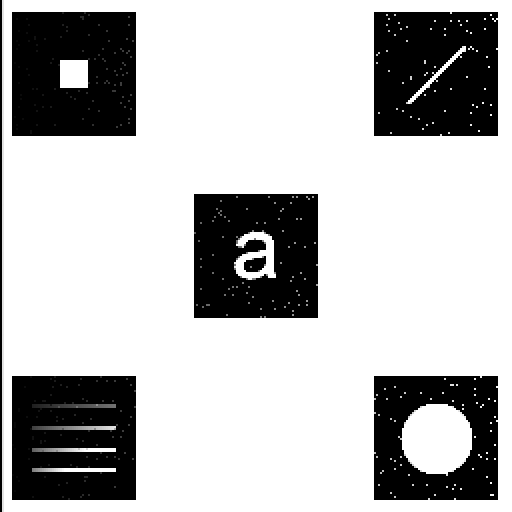

In [223]:
path = "DIP3E_Original_Images_CH03\Fig0326(a)(embedded_square_noisy_512).tif"
img1 = Image.open(path)
img1 = ImageOps.grayscale(img1)

path = "DIP3E_Original_Images_CH03\Fig0307(a)(intensity_ramp).tif"
img2 = Image.open(path)
img2 = ImageOps.grayscale(img2)

chk = multiply(img1, img2)
chk

### Q5

In [176]:
def negative(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    
    neg_img = Image.new(mode='L', size=(height, width))
    
    for r in range(height):
        for c in range(width):
            
            val = img.getpixel((r,c))
            neg_val = 255 - val
            
            neg_img.putpixel( (r,c), int(neg_val) )
            
    new_file = 'negative_img' + '.jpg'
    neg_img.save(new_file)
            
    return neg_img

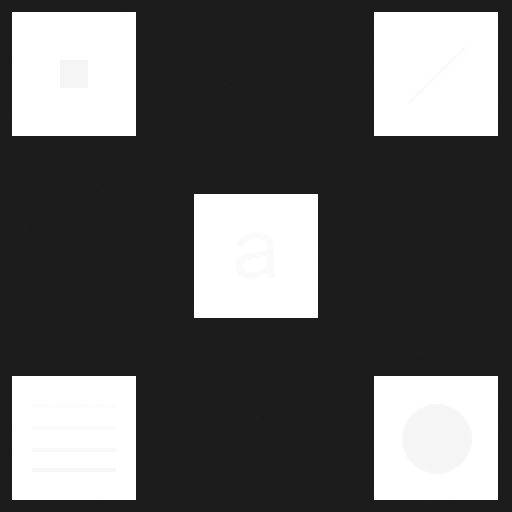

In [224]:
path = "DIP3E_Original_Images_CH03\Fig0326(a)(embedded_square_noisy_512).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = negative(img)
chk

### Q6

In [225]:
def bit_planes(img, plane_num):
    
    size = img.size
    height = size[0]
    width = size[1]
    
    planes = []
    
    for r in range(height):
        for c in range(width):
            
            val = img.getpixel((r,c))
            val = bin(val)
            
            val = val[2:]
    
            for i in range(7):
                if len(val) < 8:
                    val = '0' + val
                    
            planes.append(val)
            
    
    p1,p2,p3,p4,p5,p6,p7,p8 = "","","","","","","",""
    
    for i in range(len(planes)):
            
            p8 = str(planes[i][0]) + str(p8)
            p7 = str(planes[i][1]) + str(p7)
            p6 = str(planes[i][2]) + str(p6)
            p5 = str(planes[i][3]) + str(p5)
            p4 = str(planes[i][4]) + str(p4)
            p3 = str(planes[i][5]) + str(p3)
            p2 = str(planes[i][6]) + str(p2)
            p1 = str(planes[i][7]) + str(p1)

    return p8,p7,p6,p5,p4,p3,p2,p1

In [231]:
path = "DIP3E_Original_Images_CH03\Fig0340(a)(dipxe_text).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

p8, p7, p6, p5, p4, p3, p2, p1 = bit_planes(img, 8)

# print("8th-bit: ",p8)
# print("7th-bit: ",p7)
# print("6th-bit: ",p6)
# print("5th-bit: ",p5)
# print("4th-bit: ",p4)
# print("3rd-bit: ",p3)
# print("2nd-bit: ",p2)
# print("1st-bit: ",p1)

### Q7

In [232]:
def contrast(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    
    max_val = 0
    min_val = float('inf')
    
    for r in range(height):
        for c in range(width):
            
            val = img.getpixel((r,c))
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
    c = max_val - min_val
    
    return c
    

In [233]:
path = "DIP3E_Original_Images_CH03\Fig0326(a)(embedded_square_noisy_512).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = contrast(img)
chk

228

### Q8

In [234]:
def threshold(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    
    val = 0
    
    # brightness
    for r in range(height):
        for c in range(width):
            
            x = img.getpixel((r,c))
            
            if x > 50 and x < 200:
                val = val + x
                
    brightness = (1/(height*width)) * val
    
    print("Brightness: ", brightness)
    
    
    threshold_img = Image.new(mode='L', size=(height, width))
    
    for r in range(height):
        for c in range(width):
            
            threshold_val = img.getpixel((r,c))
            
            if threshold_val > 40:
                threshold_img.putpixel( (r, c), (255) )
            else:
                threshold_img.putpixel( (r,c), (0) )
            
    new_file = 'threshold_img' + '.jpg'
    threshold_img.save(new_file)
            
    return threshold_img    

Brightness:  36.82534573199809


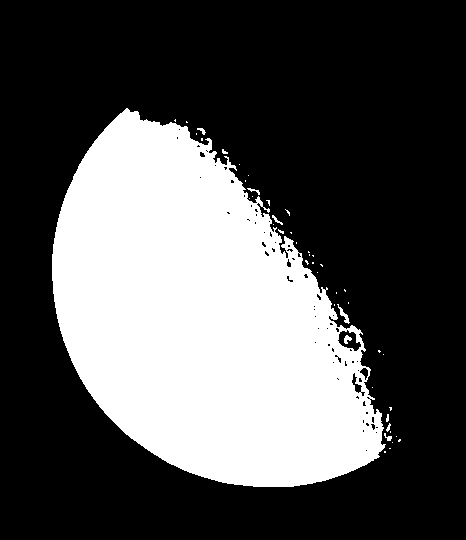

In [235]:
path = "DIP3E_Original_Images_CH03\Fig0338(a)(blurry_moon).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = threshold(img)
chk

### Q9

In [236]:
def log_transform(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    c = 1
    
    log_img = Image.new(mode='L', size=(height, width))
        
    for r in range(height):
        for c in range(width):
            
            if (c % 2) == 0:
                val = img.getpixel((r,c))
                log_img.putpixel( (r,c), (val) )
                
            elif (c%2) != 0:
                val = img.getpixel((r,c))
                s = c * math.log(1+val)
                log_img.putpixel( (r,c), int(s) )
    

    new_file = 'log_img' + '.jpg'
    log_img.save(new_file)
            
    return log_img

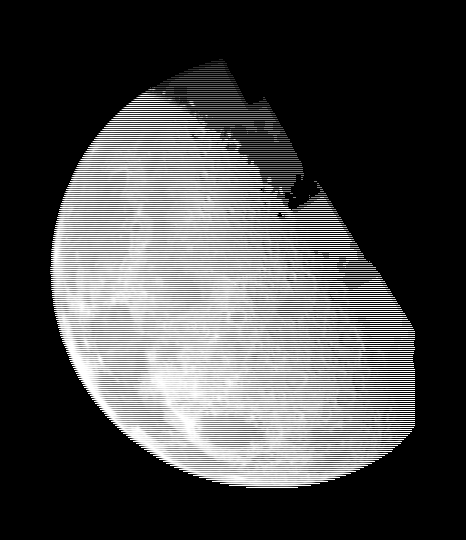

In [237]:
path = "DIP3E_Original_Images_CH03\Fig0338(a)(blurry_moon).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = log_transform(img)
chk

### Q10

In [238]:
def power_law(img, gamma):
    
    size = img.size
    height = size[0]
    width = size[1]
    c = 1
    
    power_img = Image.new(mode='L', size=(height, width))
        
    for r in range(height):
        for c in range(width):

            val = img.getpixel((r,c))
            s = c * (pow(val,gamma))
            power_img.putpixel( (r,c), int(s) )

    new_file = 'power_img' + '.jpg'
    power_img.save(new_file)
            
    return power_img

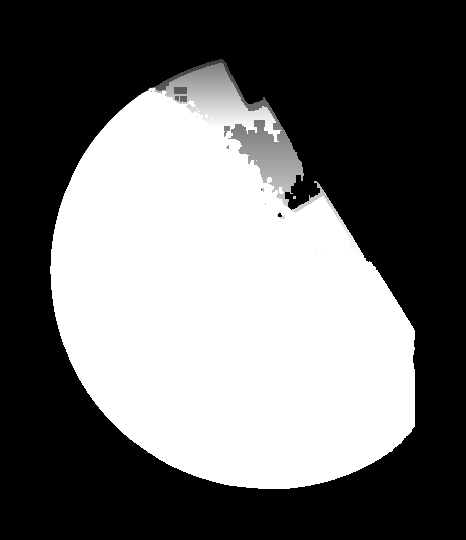

In [239]:
path = "DIP3E_Original_Images_CH03\Fig0338(a)(blurry_moon).tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = power_law(img, 1)
chk

### Q11

In [240]:
def contrast_stretch(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    a = 0
    
    c_stretch_img = Image.new(mode='L', size=(height, width))
    
    max_val = 0
    min_val = float('inf')
    
    for r in range(height):
        for c in range(width):
            
            val = img.getpixel((r,c))
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
    print(max_val, min_val)
    
    c, d = min_val, max_val
    a, b = 0, 255  # 8-bit image so 0-255
        
    for row in range(height):
        for col in range(width):

            val = img.getpixel((row,col))
            s = (val-c) * ((b-a)/(d-c)) + a
            c_stretch_img.putpixel( (row,col), int(s) )
            

    new_file = 'DIP3E_Original_Images_CH03\c_stretch_img' + '.tif'
    c_stretch_img.save(new_file)
            
    return c_stretch_img
            

83 13


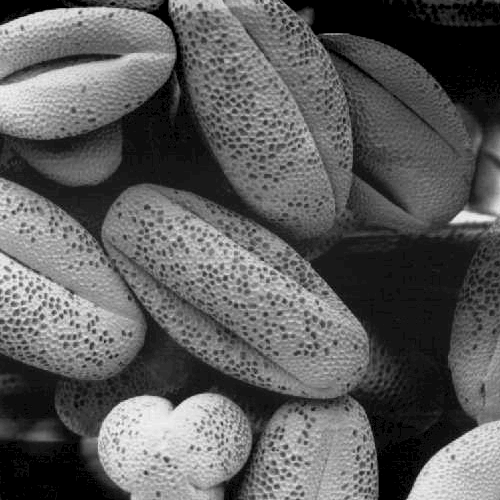

In [245]:
path = "DIP3E_Original_Images_CH03\Fig0316(4)(bottom_left).tif"      # image stretched from 83 to 252
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = contrast_stretch(img)
chk

In [246]:
# to check the stretched contrast of image

def chk(img):
    
    size = img.size
    height = size[0]
    width = size[1]
    a = 0
        
    max_val = 0
    min_val = float('inf')
    
    for r in range(height):
        for c in range(width):
            
            val = img.getpixel((r,c))
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
    print(max_val, min_val)

255 0


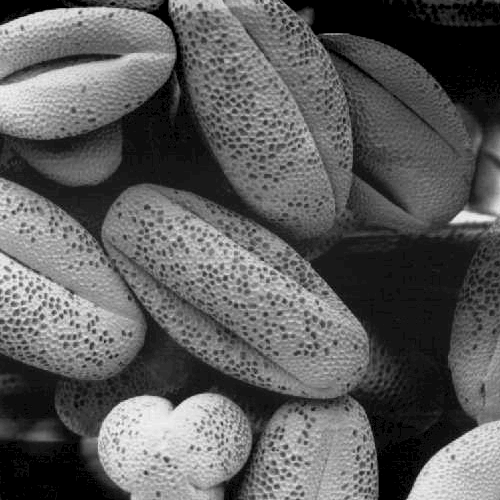

In [248]:
path = "DIP3E_Original_Images_CH03\c_stretch_img.tif"
img = Image.open(path)
img = ImageOps.grayscale(img)

chk = contrast_stretch(img)
chk